# Data Science Methods for Clean Energy Research 
## *Hypothesis testing*

## Outline

Today, we will explore the concept of Hypothesis testing.

### 1. Introduction to Hypothesis testing - 1 sample
* 1.1 Making a hypothesis - null and alternative
* 1.2 Significance level and p-values
* 1.3 Test statistics 
    * The student t-distribution
* 1.4 Student t-test / algorithm for 1 sample
    * Example applying the student t-test to a sample of puppies
* 1.5 Confidence intervals

### 2. Two sample Hypothesis testing
* 2.1 Unpaired two sample t-test
* 2.2 Paired two sample t-test

### 3. Parametric vs non parametric tests



---

## Let's load the libraries / modules

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
import scipy  # Note that you need version 1.6.0 of scipy!
import scipy.stats as stats
import math


%matplotlib inline
matplotlib.rcParams.update({'font.size': 18})

## 1. Introduction to Hypothesis testing - 1 sample

We are given a sample dataset for some 6 month old **<span style="color:darkmagenta"> puppies</span>** raised in a farm on mount Rainier and living on the farm. We want to evaluate whether the puppies have been well fed and have the correct weight based on the average weight of 6 month old puppies. Our random variable is the weight of the puppies $X$.



<div>
<img src=https://drive.google.com/uc?export=view&id=14rqkMEMWFjqs-c59kEzJxK6-HyIE2MrV width="600" align=left>
</div>

In [2]:
df_puppies = pd.read_csv('mount_rainier_puppies.csv',index_col=0)
df_puppies.describe()

,weight [lb],fluffiness [inches],happiness [unitless]
count,1000.000000,1000.000000,1000.000000
mean,18.156459,9.515452,99.499666
std,4.879776,0.495202,0.009869
min,2.466606,8.024662,99.470535
25%,15.002315,9.174699,99.492793
50%,18.084800,9.504051,99.499262
75%,21.572155,9.822307,99.506609
max,33.975454,11.029900,99.529623


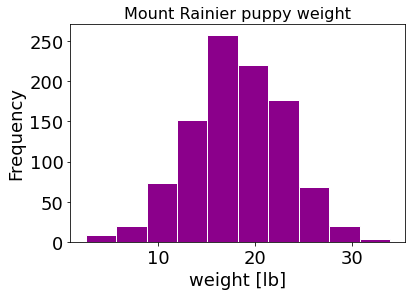

In [3]:
df_puppies['weight [lb]'].plot.hist(color="darkmagenta", edgecolor='white')
plt.title('Mount Rainier puppy weight',fontsize=16)
plt.xlabel("weight [lb]")
plt.show()

### 1.1 Making a Hypothesis: null and alternative

We are told that the average weight of puppies for the entire population at 6 months is 14lbs. We looked at the above histogram and are worried that the puppies might have eaten a bit too many snacks and that they are above the average in terms of weight?

We can make a **<span style="color:blue">null hypothesis </span>**, $H_0$ 
* Null hypothesis, $H_0$: the mean weight of the mount rainer puppies is equal the national average, 

  $\overline{X}_{\sf mount\;rainer} = \mu = $ 14 lbs 
  
An **<span style="color:blue">alternative hypothesis</span>** could be
* Alternative hypothesis, $H_a$: the mean weight of the mount rainier puppies is greater than the national average,

  $\overline{X}_{\sf mount\;rainer} > $ 14 lbs 
  

The null hypothesis is usually the boring hypothesis that nothing has changed. Here is another example of null and alternative hypotheses:

You are given a set of data from the clean energy process and you want to know whether the values of energy are on average comparable to the average energy of an organic molecule

* Null hypothesis, $H_0$: the mean $E_{LUMO}$ of the dataset is equal to the population mean $\mu_{LUMO}$
* Alternative hypothesis, $H_a$: the mean $E_{LUMO}$ of the dataset is different from the population mean $\mu_{LUMO}$


### 1.2 Significance level and p-values

Now imagine we are given the exact distribution of puppy population weight, as shown hereafter and we observe that one of the puppies named Serotonin had a weight of $x =$ 20lbs. 

In [4]:
def PDF_puppy_pop(w):
    # Note: Local variables!!
    sigma = 3
    mu = 14

    prefactor = math.pow( 2*math.pi*math.pow(sigma, 2), -0.5 ) 
    probability = prefactor * math.exp( -math.pow(w-mu, 2) / (2*math.pow(sigma, 2)) )
            
    return probability

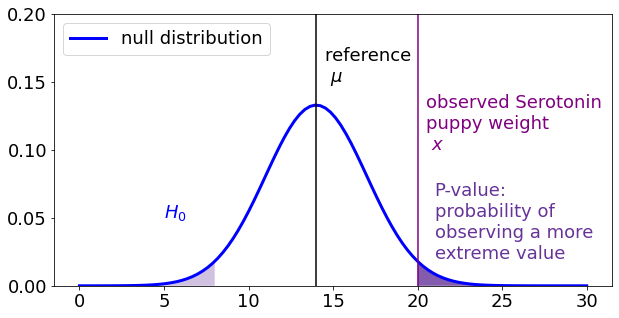

In [5]:
weights = np.linspace(0,30,100)
prob_w = [ PDF_puppy_pop(w) for w in weights ]
fix, ax = plt.subplots(figsize=(10,5))

ax.plot(weights, prob_w, color='b', lw=3, label= 'null distribution')
ax.plot([14, 14], [0, 1], c='k')
ax.plot([20, 20], [0, 1], c='purple')

ax.text(14.5,0.15,'reference \n $\mu$')
ax.text(5,0.05,'$H_0$', color='b')
ax.text(20.5,0.10, 'observed Serotonin \npuppy weight\n $ x$', color='purple')

ax.set_ylim([0,0.2])
ax.fill_between(np.linspace(0,8,100), np.zeros(100), [ PDF_puppy_pop(w) for w in np.linspace(0,8,100) ] , facecolor='rebeccapurple', alpha=0.3)
ax.fill_between(np.linspace(20,30,100), np.zeros(100), [ PDF_puppy_pop(w) for w in np.linspace(20,30,100) ] , facecolor='rebeccapurple', alpha=0.8)
ax.text(21,0.02,"P-value:\nprobability of \nobserving a more \nextreme value", color='rebeccapurple')
plt.legend()
plt.show()

How **likely** is is it that our puppy's weight **was drawn** from this population distribution? Should our null hypothesis be accepted or rejected? Is our $x$ observation unlikely to have occurred given the null hypothesis distribution i.e. is it **<span style="color:blue">statistically significant</span>** and is our alternative hypothesis correct?

* The **<span style="color:blue">p-value</span>** of $x$ is the probability of obtaining a result greater or equal to our observed value
* $x$ is considered as **statistically significant** when $$p \leq \alpha$$ where $\alpha$ is the **<span style="color:blue">significance level</span>** chosen for our study
* $\alpha$ is chosen before data collection, and is typically set to a low value e.g. 5% 

**Note: p-values** on their own **<span style="color:firebrick">do not</span>**
* Measure the probability a hypothesis such as the null hypothesis is true
* Measure the probability your data were produced by random chance
* Tell you anything about effect size
* Tell you anything about the importance of a result



One issue is that to carry out the above test, **we need to know the null hypothesis population distribution**! Otherwise we will not be able to compute the p-value to compare it to a chosen significance level ... 

Is there a way to avoid this problem? ... we are going to need more puppy weights ...

### 1.3 Test statistics - estimating the mean and standard deviation of our unknown distribution

### 1.3.1 The Student *t-distribution*


Thanks to the Central limit theorem we know that given population samples $X_i$ containing $n$ points, when we take the limit of $n\rightarrow\infty$, the distribution of means obtained from the samples follows a Normal distribution.

Specifically we know that with growing $n$ the distribution of means will have expressions for the mean and standard deviations defined as following

$$\mu_{\bar{X}} \approx \mu $$

$$\sigma_{\bar{X}}\approx \frac{\sigma}{\sqrt{n}}$$

So we could think of **comparing the means** - i.e. how different is the mean weight of our puppy sample respect to the mean of the population, assuming that $H_0$ follows a normal distribution?

We can introduce a distance of our mean $\bar{X}$ from the true mean $\mu$ 
$$D = \bar{X}-\mu$$ 
and normalize it respect to the standard deviation, appoximated to be $$\sigma\approx s$$
this quantity is defined as $t$
$$t=\frac{\bar{X}-\mu}{\frac{s}{\sqrt{n}}}$$

where

$$ s = \sqrt{\frac{\sum_{i=1}^n\left (x_i - \bar{x}\right)^2}{n-1}} $$


The distribution of $t$ values is close to being normal but it is slightly different - this comes from the fact that we are approximating $\sigma \approx s$. It becomes normal as $n\rightarrow\infty$. It is known as the **[Student t-distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution)**. 

A good reference on p-values and Student t-testing can be found here - _Significance, p-values, t-tests. Points of significance.  Nature, 2013._ 


#### Let's plot the t-distribution as a function of $n$

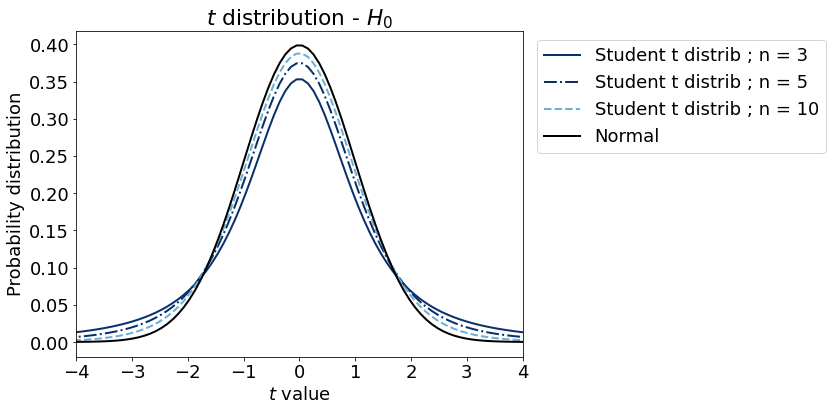

In [6]:
fig, ax = plt.subplots(figsize=(8,6))

df = [ 3, 5, 10]
x = np.linspace(-5, 5, 100)

blues = cm.get_cmap("Blues_r", len(df))
line_styles = ['-', '-.', '--', '.', 'loosely dashed']
c=0
for d in df:
    ax.plot(x, stats.t.pdf(x, d-1),'-', linestyle=line_styles[c], color=blues(c-1), lw=2,  label='Student t distrib ; n = '+str(d))
    c+=1
ax.plot(x, stats.t.pdf(x, 100000),'-', color='k', lw=2,  label='Normal')
ax.set_xlim([-4,4])
ax.legend(loc="upper right", bbox_to_anchor=(1.7, 1.0))
ax.set_xlabel('$t$ value')
ax.set_ylabel('Probability distribution')
plt.title('$t$ distribution - $H_0$')
plt.show()


Note that the tails of the Student t-distribution are higher than the normal distribution! This comes from the fact that our sample variance is usually smaller than the true variance.

<span style="color:royalblue">We can extract p-values by integrating the above Student's t-distribution!!</span>


**<span style="color:firebrick">Important:</span>** If your true data follows a different type fo distribution, you will have to use a different test statistic! e.g. the [Binomial test](https://en.wikipedia.org/wiki/Binomial_test)

### 1.4 One sample Student t-test algorithm  

Ok so now we have the tools to work out our first hypothesis test. The process for any hypothesis test is as following

<ol>
<li> Define the <b>null</b> and <b>alternative</b> hypothesis </li>
<ul>
<li><i>Null hypothesis</i>: the average weight of the 6 month old mount rainier puppies is equal to the average puppy population weight - 14lbs</li>
<li><i>Alternative hypothesis</i>: The puppies had too many snacks and their average weight is larger than the average puppy population weight - this is an upper-tailed alternative hypothesis </li>
</ul>
<br>    
<div class="container" style="height: 150px;">
<img src=https://drive.google.com/uc?export=view&id=1Xe5E9xMhvkF7B73qq7mRBLurprzo54C2 width="600" align=left>
</div>
<br><br>   
    

<li>Decide which test is appropriate and define the <b>test statistic</b> </li>
<ul>    
<li>We believe the puppy population weight null hypothesis distribution is normal, and our alternative hypothesis is that the average sample weight is larger than the population average therefore we will use the <i>Student's upper-tail t-test</i></li>
</ul>
<br>
<li>Obtain the <b>null hypothesis distribution</b> based on the chosen test statistic - that is simply the Student's T distribution for our given number of puppies in the sample</li>
    <br>
<li>Choose a <b>significance level</b> $\alpha$ - we will choose $\alpha$ = 0.05, i.e 5%</li>
<br>    
<li>Compute the <b>p-value</b></li>
<li><b>Compare</b> the p-value to $\alpha$ and decide whether your alternative hypothesis is valid - it will be true so long as $p<\alpha$</li>  
</ol>

### Example - the mount Rainier puppies

Let's carry this out for the puppies, we have done everthing up to **step 4** and we need to compute the p-value for an upper tailed test (**step 5**). To compute the p-value we would need to integrate our Student t-distribution between the weight of our puppies and $+\infty$. This distribution is a bit funky ...

$$P_{\sf{student\; t-distrib}}(X\leq x) = \frac{\Gamma{\left(\frac{\nu + 1}{2}\right)}}{\sqrt{\nu\pi}\,\Gamma(\frac{\nu}{2}}\left(1+\frac{x^2}{\nu}\right)^{-\frac{\nu+1}{2}}$$

Phew ... that is a lot of Gamma functions!!! 

Luckily for us, the values of the integral have been calculated for us in **tables** and we can access them using

`scipy.stats.ttest_1samp(a, popmean, alternative={‘two-sided’, ‘less’, ‘greater’}, **kwargs)`

by default this function takes the sample data, a, in an array format, the population mean, popmean and  returns the t-value and the p-value for a two tailed test. If you have installed the latest version of `scipy` 1.6.0, you can set they type of test using the `alternative` keyword. Otherwise, you will need to divide the output p-value by 2! Also we will have to consider the sign of the *t* value to decide whether to accept or reject the null hypothesis. 

* We will reject the null hypothesis for our upper-tailed test when $\frac{p}{2} < \alpha$ and $t > 0$ (i.e. our mean is greater than the population mean)

* If we were carrying out a lower-tailed test we would reject the null hypothesis if  $\frac{p}{2} < \alpha$ and $t < 0$

For more info on this function see [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html).

### In class exercise: compute the t-value and p-value for the mount rainier puppies

In [35]:
# Define the significance level to be 0.05
alpha = 0.05
# P-value for the puppies given that we are given the mean of 14 of our population
stats.ttest_1samp(df_puppies['weight [lb]'].values, 14, alternative='greater')


Ttest_1sampResult(statistic=26.93541607101196, pvalue=7.178502293343562e-121)

In [36]:
result = stats.ttest_1samp(df_puppies['weight [lb]'].values, 14, alternative='greater')

print("t-value", result.statistic)
print("p-value", result.pvalue)
print("significance level", alpha)

if result.pvalue < alpha :
    print("\nHmmm it looks like our puppies had too many snacks! We have to reject the null hypothesis")
else:
    print("\nOur puppies are in line with the average")

t-value 26.93541607101196
p-value 7.178502293343562e-121
significance level 0.05

Hmmm it looks like our puppies had too many snacks! We have to reject the null hypothesis


### 1.5 Confidence intervals

Here is a great point in which to get back to the concept of **confidence intervals (CI)**. A confidence interval indicates a range of plausible values for an unknown parameter such as the mean. It can be used as an error bar. A CI has an associated **confidence level** that the true population parameter is in the proposed range. The user chooses the confidence level. 

Confidence intervals are often defined as 

$$CI=\left[ \,x − c\cdot \sigma_X \,; \,x + c\cdot \sigma_X 
\,\right]$$ 

* $x$ realization of the dataset / sample
* $c$ is a constant
* $\sigma_X$ standard deviation of the dataset

We can use the Student t-distribution single sample two-sided t-test to estimate a confidence interval from our sample

* evaluate $\bar{x}$
* choose a confidence level $C$ between 0 and 100% usually one defines $C=(1-\alpha)*100$ 
* use the one sample Student t-test to compute $t$ for $\nu=n-1$

You are done! Your Student t-test based CI is
$$CI=\left[ \,\bar{x} − t\cdot \frac{s}{\sqrt{n}} \,; \,\bar{x} + t\cdot \frac{s}{\sqrt{n}}\,\right]$$ 

We can use the `scipy.stats.t.interval(alpha, df, loc=0, scale=1)` function. **<span style="color:crimson"> Watch out!</span>** - here `alpha` is not the significance level, but it is $C/100$ !

[Statistical tests, P values, confidence intervals, and power: a guide to misinterpretations Eur J Epidemiol. 2016; 31: 337–350.](https://link.springer.com/article/10.1007%2Fs10654-016-0149-3)

In [20]:
confidence_level = 0.98
nu = df_puppies['weight [lb]'].values.size - 1

sample_mean = np.mean(df_puppies['weight [lb]'].values)

sample_SE = np.std(df_puppies['weight [lb]'].values)


confidence_interval = scipy.stats.t.interval(confidence_level, nu, sample_mean, sample_SE)

print('If 100 intervals were generated from this sample '+ str(confidence_level*100)+'%\nwould indicate that the mean weight of the puppies is in the following confidence interval:\n', confidence_interval)

If 100 intervals were generated from this sample 98.0%
would indicate that the mean weight of the puppies is in the following confidence interval:
 (6.79184707138743, 29.52107168842832)


A **common misunderstanding** about CIs is that for 95% confidence level interval CI ($N_1 , N_2 $), there is a 95% probability that the true population mean lies between $N_1$ and $N_2$. This is an incorrect interpretation of 95% CI because the true population mean is a fixed unknown value that can be either inside or outside the CI


## 2. Two sample hypothesis testing

### 2.1 Unpaired two sample test using the t-distribution 

An unpaired two sample test is a test performed on the data of two random samples, each independently obtained from a **different given population**. The purpose of the test is to determine whether the **difference between these two populations is statistically significant**.

We can use an unpaired **two sample t-test** when

* the two samples are independent
* the values of the variables we are comparing are quantitative and in the same units 
* the two samples follow a normal distribution and have roughly the same variance
 

Let's consider a second dataset of puppy weights. This one was obtained from puppies in various homes in Washington state. Could these puppies have come from Mount Rainier? Is their mean weight significantly different from the first data set?

Let's load the data and see

In [21]:
WA_puppies = pd.read_csv('WA_puppies.csv',index_col=0)
WA_puppies.describe()

,weight [lb],fluffiness [inches],happiness [unitless]
count,1496.000000,1496.000000,1496.000000
mean,18.131481,9.501659,99.510025
std,4.962199,0.505075,0.010227
min,1.165249,7.871978,99.475317
25%,14.718427,9.157959,99.503194
50%,18.025062,9.501915,99.509905
75%,21.571131,9.839888,99.516858
max,34.484657,11.371368,99.540380


We can use the 

`scipy.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', alternative='two-sided')`

function which carries out the T-test for the means of two independent samples of scores, as for the one sample test, it returns the t-value and the p-value

by setting `equal_var = True` we carry out the test under the ansatz that both populations have the same variance. If you set it to `False` you will carry out the Welch's t-test .. for more info see [here](https://en.wikipedia.org/wiki/Welch%27s_t-test) 

* **null hypothesis**: both samples have the same population mean $\mu_1 = \mu_2$ - all puppies come from Mount Rainier
* **alternative hypothesis**: samples have a statistically different population mean $\mu_1 \neq \mu_2$ - they do not all come from Mount Rainier
* significance level $\alpha$ = 0.05

In [22]:
results = scipy.stats.ttest_ind(df_puppies['weight [lb]'].values, WA_puppies['weight [lb]'].values)

In [34]:
print(results)

if results.pvalue < alpha:
    print("\nIt looks like the puppies did not all come from Mount Rainier")
else:
    print("\nAll the puppies came from Mount Rainier")

Ttest_relResult(statistic=-12.126861335388869, pvalue=1.131742641685814e-31)

It looks like the puppies did not all come from Mount Rainier


### 2.2 Paired two sample t-test

The paired t-test, tests whether the mean values of two **dependent** samples differ significantly from each other. 

We can use the **paired two sample t-test** when:

* we have two dependent samples
* we have the same units for the variables of interest (quantitative)
* we assume that the difference between the paired values is normally distributed

For example we could test whether the weight of the puppies depends on the fact that the data was collected before or after the christmas break - i.e. did they receive so many treats over christmas that their weight increased.


* Null hypothesis: The mean value of the two dependent puppy weight samples is equal.
* Alternative hypothesis: The mean values of the two dependent puppy weight samples are different.



In [24]:
df_puppies_pre_xmass = pd.read_csv('mount_rainier_puppies_before_xmass.csv',index_col=0)

How does it work? We can use a single sample t-test! Indeed, if we define $X_{diff}$ as our random variable - the difference between two values, one from sample 1 and one from sample 2, we know that the population mean of the the null hypothesis is zero!

$$t=\frac{\bar{X}_{diff}-\mu}{\frac{s_{diff}}{\sqrt{n}}}=\frac{\bar{X}_{diff}-0}{\frac{s_{diff}}{\sqrt{n}}}$$


There is a function in `scipy` which will do this for us

`scipy.stats.ttest_rel(a, b, axis=0, nan_policy='propagate', alternative='two-sided')`

### In class exercise - let's test this out for the puppies

In [31]:
# Define the significance level alpha = 0.05
alpha = 0.05

# Compute p-value and t-value 
ris1 = stats.ttest_rel(df_puppies['weight [lb]'].values, df_puppies_pre_xmass['weight [lb]'].values, alternative='two-sided')
results = stats.ttest_rel(df_puppies_pre_xmass['weight [lb]'].values, df_puppies['weight [lb]'], alternative='two-sided')

In [33]:
print(ris1)
print(results)
print("Note - the sign changes because the X_diff random variable is the opposite respect to the first case, but the p-value (integral) is the same ")

Ttest_relResult(statistic=12.126861335388869, pvalue=1.131742641685814e-31)
Ttest_relResult(statistic=-12.126861335388869, pvalue=1.131742641685814e-31)


In [32]:
print("p-value",results.pvalue,"t-value", results.statistic)

if results.pvalue < alpha:
    print("\nIt looks like the puppies ate too many snacks over xmass!")
else:
    print("\nThe puppies' weight does not seem correlated to the xmass break")

p-value 1.131742641685814e-31 t-value -12.126861335388869

It looks like the puppies ate too many snacks over xmass!


### 3. Parametric versus non parametric tests

What we saw today are **parametric tests**; they make assumptions about the parameters and form of the population distributions from which our data are being sampled!

**Non-parametric tests** are “distribution-free” tests; they make fewer if any assumptions about the nature of the data!

Can be useful if:
* Your data deviate from canonical distributions, e.g. skew
* Your data are better described by the median (recall...)
* You have small sample sizes
* Your data are ranked or ordinal in nature

Examples of parametric and non parametric tests:

|Samples| Parametric tests     | Non-parametric tests |
|:----------|:----------- | :----------- |
|one | 1-sample t-test    | 1-sample Sign, 1-sample Wilcoxon    |
|two | Unpaired or Paired t-test   | Mann-Whitney U-test        |

### Summary of t-tests

<div class="container" style="height: 150px;">
<img src=https://datatab.net/assets/tutorial/paired_tTest_en.png width="600" align=left>
</div>
